In [1]:
import numpy as np
from dev_model_proto import *
import model_proto as m
import matplotlib.pyplot as plt
import get_cullin_e3_ppi_from_pdb70
import cullin_benchmark_test
from pathlib import Path
import jax

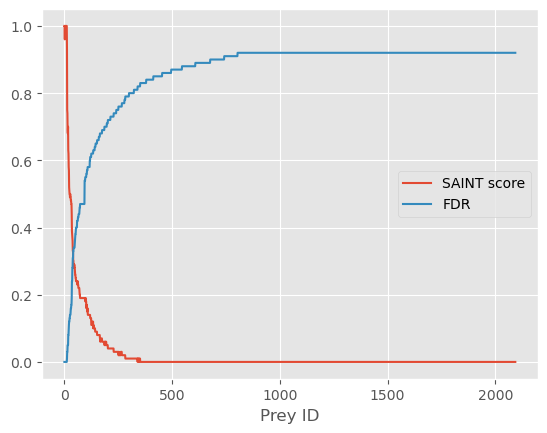

In [14]:
# Define possible prey for cbfb
cb_path = Path("../../data/raw/cullin_e3_ligase/")
cb = cullin_benchmark_test.CullinBenchMark(cb_path)
bait_id = "CBFBwt_MG132"
sel1 = cb.data["Bait"] == bait_id
sel2 = cb.data["SaintScore"] >= 0.3

cb.data = cb.data.loc[sel1, :]
# Visualize the data

def plot_saint_fdr(cb):
    plt.style.use('ggplot')
    plt.plot(cb.data['SaintScore'], label='SAINT score')
    plt.plot(cb.data['BFDR'],  label="FDR")
    plt.legend()
    plt.xlabel('Prey ID')
    
plot_saint_fdr(cb)
# Look at the distribution of adjacency matices As

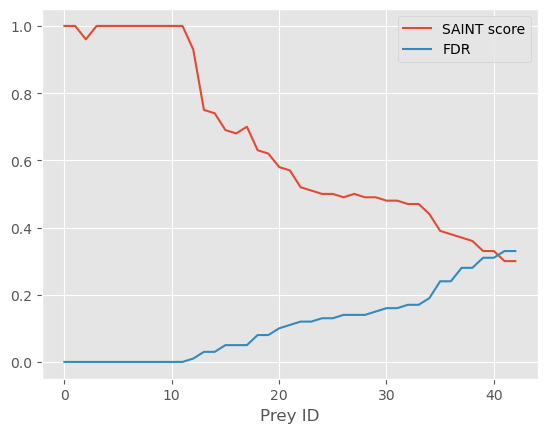

In [15]:
cb.data = cb.data.loc[sel2, :]
plot_saint_fdr(cb)

In [16]:
Ss = np.array(cb.data['SaintScore'])

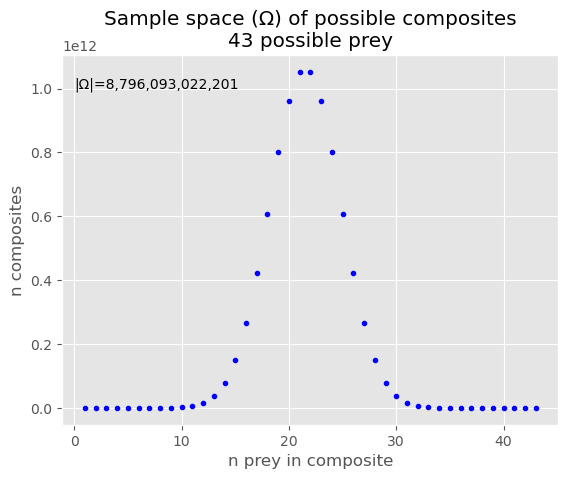

In [17]:
mp.plot_sample_space(Ss, textx=0, texty=1e12)

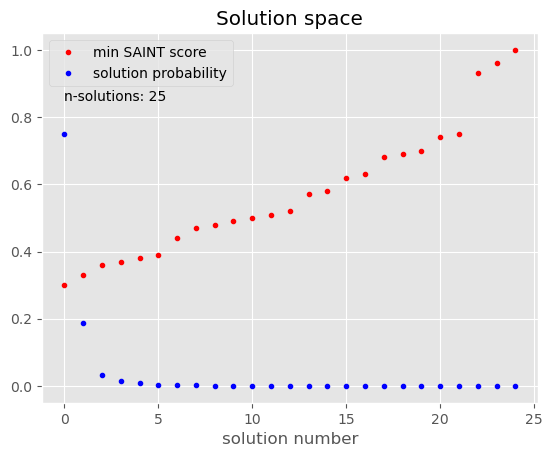

In [18]:
mp.plot_solution_space(Ss)

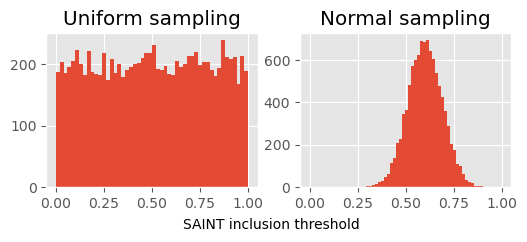

In [19]:
mp.plot_samples(Ss)

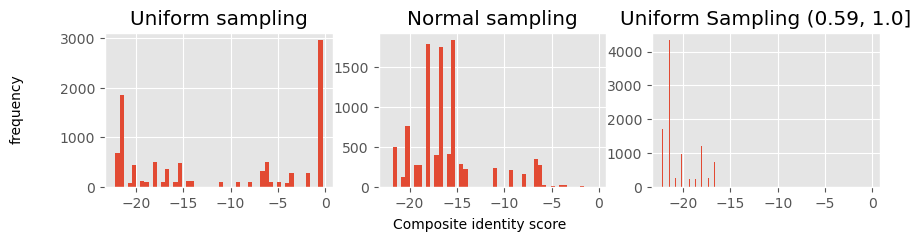

In [20]:
mp.plot_triple_samples(Ss)

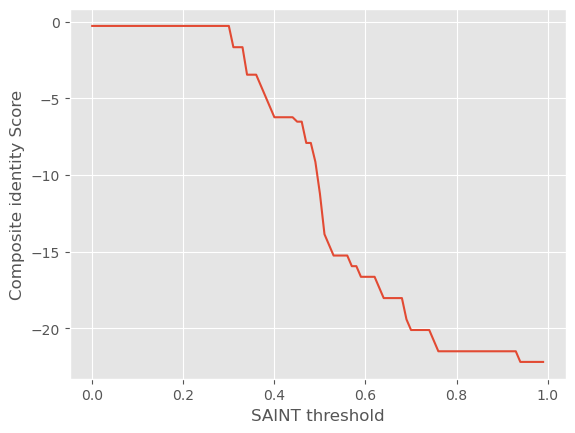

In [21]:
mp.plot_score_saint(Ss)

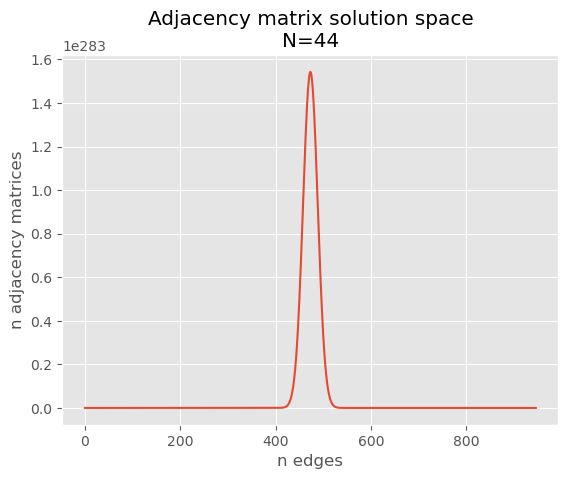

In [22]:
# Now what about enumerating Adjacency matrices?

_ = mp.plot_As_solution_space(44)

In [8]:
n_examples = 1000
p = 0.1
key = jax.random.PRNGKey(13)
n_edges = np.zeros(n_examples)
disconnectivity = np.zeros(n_examples)
for i in range(n_examples):
    key, k1 = jax.random.split(key)
    A = mp.proposal(k1, 44, n_examples, p=p)
    A = np.array(A, dtype=int)
    nedges = mp.nedges(A)
    n_edges[i] = nedges
    disconnectivity[i] = mp.d(A, np.arange(44))

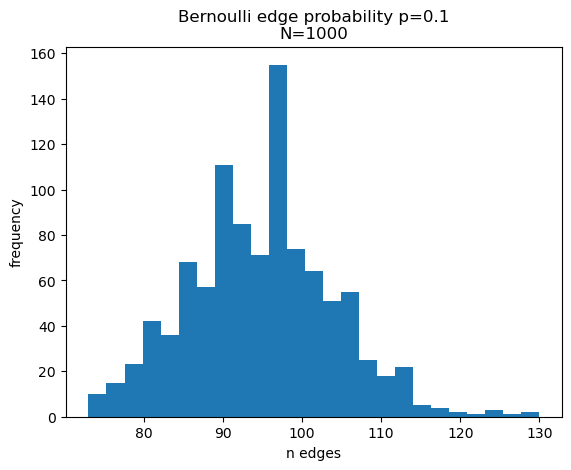

In [14]:
plt.hist(n_edges, bins=25)
plt.xlabel('n edges')
plt.ylabel('frequency')
plt.title(f'Bernoulli edge probability p={p}\nN={n_examples}')
plt.show()

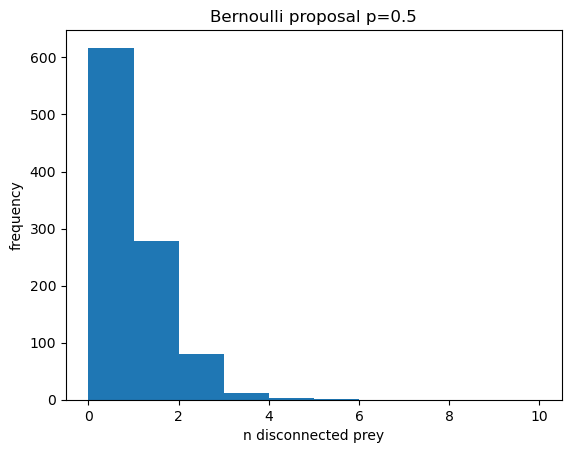

In [20]:
plt.hist(disconnectivity, bins=10, range=(0, 10))
plt.xlabel('n disconnected prey')
plt.ylabel('frequency')
plt.title('Bernoulli proposal p=0.5')
plt.show()

In [18]:
# 1 sample a composite

# 2 sample a 

In [43]:
mp.d(np.zeros((44, 44), dtype=int), np.arange(44))

43

In [ ]:
lambdas = [0.1, 1, 10]
def gen_data(lambda_s, density=False):
    ys = []
    xs = []
    for i in range(1, len(A)+1):
        Cs = np.arange(i)

        n_dis = m.d(A, Cs)
        score = m.log_pdf_As__Cs_lambda_s(A, Cs, lambda_s)
        ys.append(score)
        xs.append(n_dis)
    if density:
        xs = xs
        ys = np.exp(ys)
    return xs, ys
        
density = True
xs, ys = gen_data(0.1, density=density)
xs_1, ys_1 = gen_data(1, density=density)
xs_10, ys_10 = gen_data(2, density=density)


In [ ]:
def plot_composite_connectivity():
    plt.title("Composite connectivity restraint")
    plt.style.use('ggplot')
    plt.plot(xs, ys, 'g.', label=u'\u03BB 0.1')
    plt.plot(xs_1, ys_1, 'r.', label=u'\u03BB 1')
    plt.plot(xs_10, ys_10, 'b.', label=u'\u03BB 10')
    plt.xlabel('Disconnected prey')
    plt.ylabel('P(As | Cs, lambda_s)')
    plt.legend()

##### plt.title("Composite connectivity log density")
plt.style.use('ggplot')
plt.plot(xs, np.log(ys), 'g-', label=u'\u03BB 0.1')
plt.plot(xs_1, np.log(ys_1), 'r-', label=u'\u03BB 1')
plt.plot(xs_10, np.log(ys_10), 'b-', label=u'\u03BB 10')
plt.xlabel('Disconnected prey')
plt.ylabel('log P(As | Cs, lambda_s)')
plt.legend()